In [29]:
import os
from torch.nn import functional
import torch
from torchvision.transforms import Compose,Resize,Normalize,ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import KFold
import warnings
from tqdm.notebook import tqdm_notebook
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [30]:
classes = {0:'Cloth_Mask', 1:'N-95', 2:'N-95 with valve', 3:'No_Mask',4:'Surgical_Mask'}
target_names = ['Cloth_Mask', 'N95', 'N95_With_Valve', 'No_Mask', 'Surgical']
labels_names = [0,1,2,3,4]
mean=[0.485, 0.456, 0.406]
std=[0.225, 0.225, 0.225]
transformer = Compose([Resize((128,128)), ToTensor(), Normalize(mean=mean,std=std)])

In [31]:
def evaluate_bias(path,category,model):
    for sub_category in os.listdir(path):
        print(f'Evaluating Bias on {category} Category: {sub_category}')
        dataset = ImageFolder(root=os.path.join(path,sub_category),transform=transformer)
        data_test_loader = DataLoader(dataset,batch_size=1)

        correct_labels = []
        predicted_labels = []

        model.eval()
        with torch.no_grad():
            for  i,(images,labels) in enumerate(data_test_loader):
                outputs = model(images.to(device))
                outputs = torch.argmax(functional.softmax(outputs),dim=1)
                if predicted_labels==[]:
                    correct_labels=labels[:];
                    predicted_labels = outputs[:]

                else:

                    correct_labels = torch.hstack([correct_labels,labels])
                    predicted_labels = torch.hstack([predicted_labels,outputs])

            cm = confusion_matrix(correct_labels, predicted_labels,labels=labels_names)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
            disp = disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
            plt.show()
            print(classification_report(correct_labels, predicted_labels,labels=labels_names,target_names=target_names))


<h1>Loading old Model for Bias Testing</h1>

In [32]:
from cnn_old import CNN_Old
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_old = CNN_Old().to(device)
print(model_old)
model_old.load_state_dict(torch.load("CNN_old.data"), strict=False)

CNN_Old(
  (convolution_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, aff

<All keys matched successfully>

<h2>Bias Testing for Age</h2>

Evaluating Bias on Age Category: Old


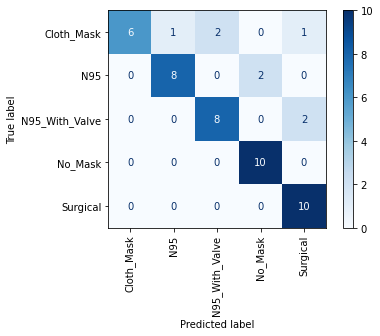

                precision    recall  f1-score   support

    Cloth_Mask       1.00      0.60      0.75        10
           N95       0.89      0.80      0.84        10
N95_With_Valve       0.80      0.80      0.80        10
       No_Mask       0.83      1.00      0.91        10
      Surgical       0.77      1.00      0.87        10

      accuracy                           0.84        50
     macro avg       0.86      0.84      0.83        50
  weighted avg       0.86      0.84      0.83        50

Evaluating Bias on Age Category: Adult


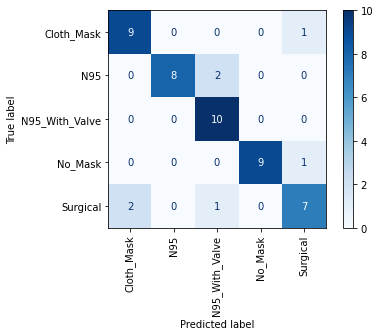

                precision    recall  f1-score   support

    Cloth_Mask       0.82      0.90      0.86        10
           N95       1.00      0.80      0.89        10
N95_With_Valve       0.77      1.00      0.87        10
       No_Mask       1.00      0.90      0.95        10
      Surgical       0.78      0.70      0.74        10

      accuracy                           0.86        50
     macro avg       0.87      0.86      0.86        50
  weighted avg       0.87      0.86      0.86        50

Evaluating Bias on Age Category: Children


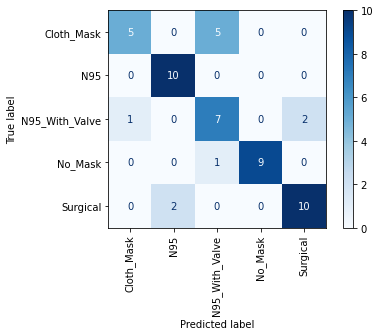

                precision    recall  f1-score   support

    Cloth_Mask       0.83      0.50      0.62        10
           N95       0.83      1.00      0.91        10
N95_With_Valve       0.54      0.70      0.61        10
       No_Mask       1.00      0.90      0.95        10
      Surgical       0.83      0.83      0.83        12

      accuracy                           0.79        52
     macro avg       0.81      0.79      0.78        52
  weighted avg       0.81      0.79      0.79        52



In [33]:
img_path = 'Bias/Age'
category = 'Age'
evaluate_bias(img_path,category,model_old)

<h2>Bias Testing for Gender</h2>

Evaluating Bias on Gender Category: Male


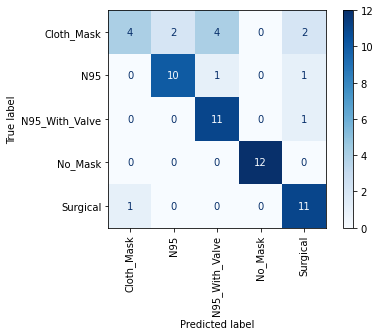

                precision    recall  f1-score   support

    Cloth_Mask       0.80      0.33      0.47        12
           N95       0.83      0.83      0.83        12
N95_With_Valve       0.69      0.92      0.79        12
       No_Mask       1.00      1.00      1.00        12
      Surgical       0.73      0.92      0.81        12

      accuracy                           0.80        60
     macro avg       0.81      0.80      0.78        60
  weighted avg       0.81      0.80      0.78        60

Evaluating Bias on Gender Category: Female


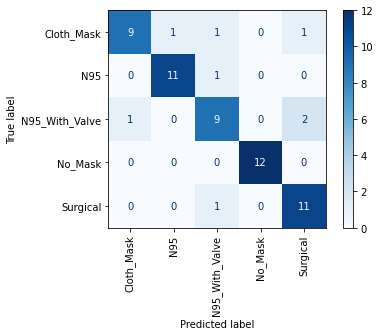

                precision    recall  f1-score   support

    Cloth_Mask       0.90      0.75      0.82        12
           N95       0.92      0.92      0.92        12
N95_With_Valve       0.75      0.75      0.75        12
       No_Mask       1.00      1.00      1.00        12
      Surgical       0.79      0.92      0.85        12

      accuracy                           0.87        60
     macro avg       0.87      0.87      0.87        60
  weighted avg       0.87      0.87      0.87        60



In [34]:
img_path = 'Bias/Gender'
category = 'Gender'
evaluate_bias(img_path,category,model_old)

<h1>Loading New Model </h1>

In [35]:
from cnn_new import CNN_New
model_new = CNN_New().to(device)
print(model_new)
model_new.load_state_dict(torch.load("CNN_new.data"), strict=False)

CNN_New(
  (convolution_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected_layers): Sequential(
    (0): Linea

<All keys matched successfully>

<h1>Bias Testing for Age (New Model)</h2>

Evaluating Bias on Age Category: Old


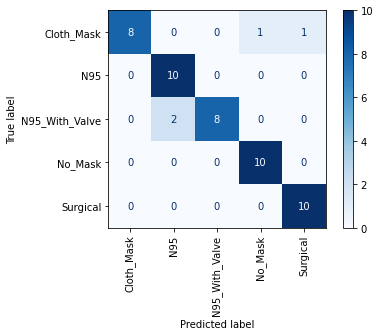

                precision    recall  f1-score   support

    Cloth_Mask       1.00      0.80      0.89        10
           N95       0.83      1.00      0.91        10
N95_With_Valve       1.00      0.80      0.89        10
       No_Mask       0.91      1.00      0.95        10
      Surgical       0.91      1.00      0.95        10

      accuracy                           0.92        50
     macro avg       0.93      0.92      0.92        50
  weighted avg       0.93      0.92      0.92        50

Evaluating Bias on Age Category: Adult


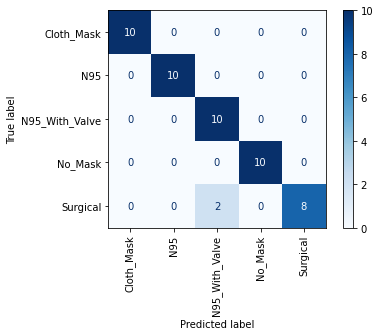

                precision    recall  f1-score   support

    Cloth_Mask       1.00      1.00      1.00        10
           N95       1.00      1.00      1.00        10
N95_With_Valve       0.83      1.00      0.91        10
       No_Mask       1.00      1.00      1.00        10
      Surgical       1.00      0.80      0.89        10

      accuracy                           0.96        50
     macro avg       0.97      0.96      0.96        50
  weighted avg       0.97      0.96      0.96        50

Evaluating Bias on Age Category: Children


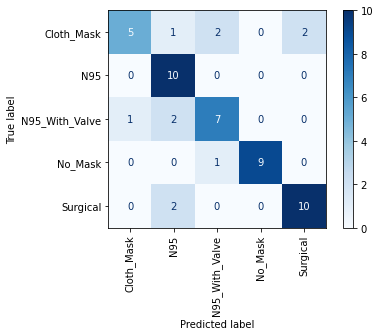

                precision    recall  f1-score   support

    Cloth_Mask       0.83      0.50      0.62        10
           N95       0.67      1.00      0.80        10
N95_With_Valve       0.70      0.70      0.70        10
       No_Mask       1.00      0.90      0.95        10
      Surgical       0.83      0.83      0.83        12

      accuracy                           0.79        52
     macro avg       0.81      0.79      0.78        52
  weighted avg       0.81      0.79      0.78        52



In [36]:
img_path = 'Bias/Age'
category = 'Age'
evaluate_bias(img_path,category,model_new)

<h2>Bias Testing for Gender (New Model)</h2>

Evaluating Bias on Gender Category: Male


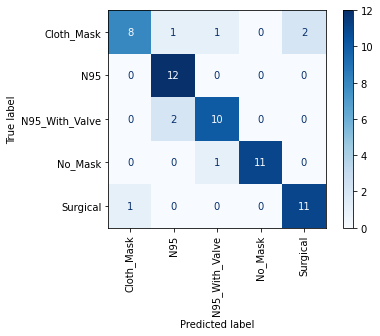

                precision    recall  f1-score   support

    Cloth_Mask       0.89      0.67      0.76        12
           N95       0.80      1.00      0.89        12
N95_With_Valve       0.83      0.83      0.83        12
       No_Mask       1.00      0.92      0.96        12
      Surgical       0.85      0.92      0.88        12

      accuracy                           0.87        60
     macro avg       0.87      0.87      0.86        60
  weighted avg       0.87      0.87      0.86        60

Evaluating Bias on Gender Category: Female


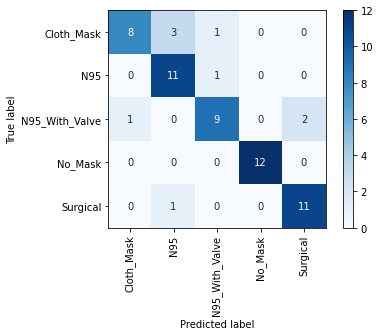

                precision    recall  f1-score   support

    Cloth_Mask       0.89      0.67      0.76        12
           N95       0.73      0.92      0.81        12
N95_With_Valve       0.82      0.75      0.78        12
       No_Mask       1.00      1.00      1.00        12
      Surgical       0.85      0.92      0.88        12

      accuracy                           0.85        60
     macro avg       0.86      0.85      0.85        60
  weighted avg       0.86      0.85      0.85        60



In [37]:
img_path = 'Bias/Gender'
category = 'Gender'
evaluate_bias(img_path,category,model_new)

<h1>K-Fold</h1>

In [38]:
epochs = 20
folds = 10
batch_size = 32
learning_rate = 0.001
data_path = 'Project_Dataset_2'

In [39]:
complete_dataset = ImageFolder(root=data_path, transform=transformer)
fold_metrics = []
kf = KFold(n_splits=folds, shuffle=True)
for fold, (train, valid) in enumerate(kf.split(complete_dataset)):
    print(f"Fold {fold + 1} training in progress...")
    train_loader = DataLoader(complete_dataset, batch_size=32, sampler=train)
    valid_loader = DataLoader(complete_dataset, batch_size=32, sampler=valid)

    model = CNN_New().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_func = nn.CrossEntropyLoss()

    model.train()
    for epoch in tqdm_notebook(range(epochs) , desc = f"Fold {fold+1}, Epochs Completed : "):
        for i, (batch, labels) in enumerate(train_loader):
            outputs = model(batch.to(device))
            model.zero_grad()
            loss_training = loss_func(outputs, labels.to(device))
            loss_training.backward()
            optimizer.step()
        print(f"\tEpoch - {epoch + 1}, Training Loss : {loss_training} ")

    model.eval()
    correct_labels = []
    predicted_labels = []

    with torch.no_grad():
        for i, (images,labels) in enumerate(valid_loader):
            outputs = model(images.to(device))
            outputs = torch.argmax(functional.softmax(outputs), dim=1)
            if predicted_labels==[]:
                correct_labels=labels[:];
                predicted_labels = outputs[:]
            else:
                correct_labels = torch.hstack([correct_labels,labels])
                predicted_labels = torch.hstack([predicted_labels,outputs])
        accuracy = float((correct_labels == predicted_labels).sum() / len(correct_labels))
        precision = precision_score(correct_labels, predicted_labels, average='weighted')
        recall = recall_score(correct_labels, predicted_labels, average='weighted')
        f1 = f1_score(correct_labels, predicted_labels, average='weighted')
        fold_metrics.append((accuracy, precision, recall, f1))

        print(f"\nFold {fold+1} Classification Report : ")
        print(classification_report(correct_labels, predicted_labels,target_names = complete_dataset.classes))

Fold 1 training in progress...


Fold 1, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 27.6801815032959 
	Epoch - 3, Training Loss : 7.683254079893231e-05 
	Epoch - 4, Training Loss : 5.451854705810547 
	Epoch - 5, Training Loss : 0.10030167549848557 
	Epoch - 6, Training Loss : 0.38973262906074524 
	Epoch - 7, Training Loss : 0.3598671853542328 
	Epoch - 8, Training Loss : 0.1128820851445198 
	Epoch - 9, Training Loss : 0.417525053024292 
	Epoch - 10, Training Loss : 0.34577617049217224 
	Epoch - 11, Training Loss : 0.33266159892082214 
	Epoch - 12, Training Loss : 0.2741755545139313 
	Epoch - 13, Training Loss : 0.19339191913604736 
	Epoch - 14, Training Loss : 0.16764581203460693 
	Epoch - 15, Training Loss : 0.17417186498641968 
	Epoch - 16, Training Loss : 0.18281449377536774 
	Epoch - 17, Training Loss : 0.18885570764541626 
	Epoch - 18, Training Loss : 0.23298631608486176 
	Epoch - 19, Training Loss : 0.26329463720321655 
	Epoch - 20, Training Loss : 0.2601678669452667 

Fold 1 Classification Report : 
 

Fold 2, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 6.675125598907471 
	Epoch - 3, Training Loss : 3.433006525039673 
	Epoch - 4, Training Loss : 0.0010338412830606103 
	Epoch - 5, Training Loss : 0.7810182571411133 
	Epoch - 6, Training Loss : 1.8922706842422485 
	Epoch - 7, Training Loss : 0.7557776570320129 
	Epoch - 8, Training Loss : 0.38835132122039795 
	Epoch - 9, Training Loss : 0.7680466175079346 
	Epoch - 10, Training Loss : 1.2363591194152832 
	Epoch - 11, Training Loss : 0.9796113967895508 
	Epoch - 12, Training Loss : 0.7550843358039856 
	Epoch - 13, Training Loss : 0.7384372353553772 
	Epoch - 14, Training Loss : 0.7788452506065369 
	Epoch - 15, Training Loss : 0.7226400375366211 
	Epoch - 16, Training Loss : 0.6703231930732727 
	Epoch - 17, Training Loss : 0.6298763155937195 
	Epoch - 18, Training Loss : 0.5964928269386292 
	Epoch - 19, Training Loss : 0.5685757994651794 
	Epoch - 20, Training Loss : 0.5434222221374512 

Fold 2 Classification Report : 
         

Fold 3, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 12.071097373962402 
	Epoch - 3, Training Loss : 0.00020190246868878603 
	Epoch - 4, Training Loss : 0.13023830950260162 
	Epoch - 5, Training Loss : 1.875820517539978 
	Epoch - 6, Training Loss : 0.7539131045341492 
	Epoch - 7, Training Loss : 0.14939601719379425 
	Epoch - 8, Training Loss : 0.12420418858528137 
	Epoch - 9, Training Loss : 0.2584855258464813 
	Epoch - 10, Training Loss : 0.22376056015491486 
	Epoch - 11, Training Loss : 0.4877474308013916 
	Epoch - 12, Training Loss : 0.3076375424861908 
	Epoch - 13, Training Loss : 0.2477024793624878 
	Epoch - 14, Training Loss : 0.20676060020923615 
	Epoch - 15, Training Loss : 0.23223793506622314 
	Epoch - 16, Training Loss : 0.20457737147808075 
	Epoch - 17, Training Loss : 0.1945921778678894 
	Epoch - 18, Training Loss : 0.17122529447078705 
	Epoch - 19, Training Loss : 0.1504715234041214 
	Epoch - 20, Training Loss : 0.15288762748241425 

Fold 3 Classification Report : 

Fold 4, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 27.77010154724121 
	Epoch - 3, Training Loss : 0.0 
	Epoch - 4, Training Loss : 0.0006454495014622808 
	Epoch - 5, Training Loss : 1.675850510597229 
	Epoch - 6, Training Loss : 1.4796819686889648 
	Epoch - 7, Training Loss : 1.5299941301345825 
	Epoch - 8, Training Loss : 0.9755957722663879 
	Epoch - 9, Training Loss : 0.45187053084373474 
	Epoch - 10, Training Loss : 0.4135577976703644 
	Epoch - 11, Training Loss : 0.434556245803833 
	Epoch - 12, Training Loss : 0.46622908115386963 
	Epoch - 13, Training Loss : 0.4926782548427582 
	Epoch - 14, Training Loss : 0.4968794286251068 
	Epoch - 15, Training Loss : 0.47744521498680115 
	Epoch - 16, Training Loss : 0.443968266248703 
	Epoch - 17, Training Loss : 0.4116877615451813 
	Epoch - 18, Training Loss : 0.3927057087421417 
	Epoch - 19, Training Loss : 0.39126405119895935 
	Epoch - 20, Training Loss : 0.4040059745311737 

Fold 4 Classification Report : 
                precisi

Fold 5, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 18.001497268676758 
	Epoch - 3, Training Loss : 0.005361445248126984 
	Epoch - 4, Training Loss : 0.3353956639766693 
	Epoch - 5, Training Loss : 0.1355697065591812 
	Epoch - 6, Training Loss : 0.5036984086036682 
	Epoch - 7, Training Loss : 0.7881222367286682 
	Epoch - 8, Training Loss : 0.8813843727111816 
	Epoch - 9, Training Loss : 0.6185383200645447 
	Epoch - 10, Training Loss : 0.6214194297790527 
	Epoch - 11, Training Loss : 0.7784602046012878 
	Epoch - 12, Training Loss : 0.7031140923500061 
	Epoch - 13, Training Loss : 0.6537095308303833 
	Epoch - 14, Training Loss : 0.6476410031318665 
	Epoch - 15, Training Loss : 0.6408202648162842 
	Epoch - 16, Training Loss : 0.6146745681762695 
	Epoch - 17, Training Loss : 0.6001867651939392 
	Epoch - 18, Training Loss : 0.5727673172950745 
	Epoch - 19, Training Loss : 0.5137391090393066 
	Epoch - 20, Training Loss : 0.4721308946609497 

Fold 5 Classification Report : 
         

Fold 6, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 49.62771224975586 
	Epoch - 3, Training Loss : 0.00019734387751668692 
	Epoch - 4, Training Loss : 0.05755135416984558 
	Epoch - 5, Training Loss : 0.08503741770982742 
	Epoch - 6, Training Loss : 1.824154019355774 
	Epoch - 7, Training Loss : 1.1705869436264038 
	Epoch - 8, Training Loss : 0.5694793462753296 
	Epoch - 9, Training Loss : 0.7593939304351807 
	Epoch - 10, Training Loss : 0.8131851553916931 
	Epoch - 11, Training Loss : 1.0214418172836304 
	Epoch - 12, Training Loss : 0.9540000557899475 
	Epoch - 13, Training Loss : 0.7497559189796448 
	Epoch - 14, Training Loss : 0.6806486248970032 
	Epoch - 15, Training Loss : 0.6434162259101868 
	Epoch - 16, Training Loss : 0.6702654957771301 
	Epoch - 17, Training Loss : 0.7221338152885437 
	Epoch - 18, Training Loss : 0.6580625772476196 
	Epoch - 19, Training Loss : 0.6869376301765442 
	Epoch - 20, Training Loss : 0.606464684009552 

Fold 6 Classification Report : 
        

Fold 7, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 14.782822608947754 
	Epoch - 3, Training Loss : 0.0010965002002194524 
	Epoch - 4, Training Loss : 0.07008928060531616 
	Epoch - 5, Training Loss : 3.588977813720703 
	Epoch - 6, Training Loss : 1.7240902185440063 
	Epoch - 7, Training Loss : 0.933124840259552 
	Epoch - 8, Training Loss : 0.0011910152388736606 
	Epoch - 9, Training Loss : 0.4672721326351166 
	Epoch - 10, Training Loss : 0.8507615923881531 
	Epoch - 11, Training Loss : 0.8302358984947205 
	Epoch - 12, Training Loss : 0.5295619964599609 
	Epoch - 13, Training Loss : 0.44778403639793396 
	Epoch - 14, Training Loss : 0.4512101411819458 
	Epoch - 15, Training Loss : 0.47871407866477966 
	Epoch - 16, Training Loss : 0.485918253660202 
	Epoch - 17, Training Loss : 0.49445223808288574 
	Epoch - 18, Training Loss : 0.49694594740867615 
	Epoch - 19, Training Loss : 0.47956380248069763 
	Epoch - 20, Training Loss : 0.4538688659667969 

Fold 7 Classification Report : 
  

Fold 8, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 35.595314025878906 
	Epoch - 3, Training Loss : 0.12027717381715775 
	Epoch - 4, Training Loss : 0.0001556545466883108 
	Epoch - 5, Training Loss : 0.16317762434482574 
	Epoch - 6, Training Loss : 1.488587498664856 
	Epoch - 7, Training Loss : 0.7485103607177734 
	Epoch - 8, Training Loss : 0.5160831212997437 
	Epoch - 9, Training Loss : 0.4097784757614136 
	Epoch - 10, Training Loss : 0.374076247215271 
	Epoch - 11, Training Loss : 0.34443601965904236 
	Epoch - 12, Training Loss : 0.3330038785934448 
	Epoch - 13, Training Loss : 0.3352780044078827 
	Epoch - 14, Training Loss : 0.3575097322463989 
	Epoch - 15, Training Loss : 0.3889467716217041 
	Epoch - 16, Training Loss : 0.4223599433898926 
	Epoch - 17, Training Loss : 0.4477786123752594 
	Epoch - 18, Training Loss : 0.46128496527671814 
	Epoch - 19, Training Loss : 0.45903778076171875 
	Epoch - 20, Training Loss : 0.4476141631603241 

Fold 8 Classification Report : 
     

Fold 9, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 34.350704193115234 
	Epoch - 3, Training Loss : 2.0957229137420654 
	Epoch - 4, Training Loss : 0.35985901951789856 
	Epoch - 5, Training Loss : 0.13999642431735992 
	Epoch - 6, Training Loss : 0.9557932019233704 
	Epoch - 7, Training Loss : 0.5411637425422668 
	Epoch - 8, Training Loss : 0.5343061089515686 
	Epoch - 9, Training Loss : 0.3804568946361542 
	Epoch - 10, Training Loss : 0.07461877167224884 
	Epoch - 11, Training Loss : 0.27964648604393005 
	Epoch - 12, Training Loss : 0.17356537282466888 
	Epoch - 13, Training Loss : 0.14945587515830994 
	Epoch - 14, Training Loss : 0.1398913413286209 
	Epoch - 15, Training Loss : 0.15668627619743347 
	Epoch - 16, Training Loss : 0.21646547317504883 
	Epoch - 17, Training Loss : 0.25075826048851013 
	Epoch - 18, Training Loss : 0.2415151745080948 
	Epoch - 19, Training Loss : 0.2145855873823166 
	Epoch - 20, Training Loss : 0.17924147844314575 

Fold 9 Classification Report : 
 

Fold 10, Epochs Completed :   0%|          | 0/20 [00:00<?, ?it/s]

	Epoch - 1, Training Loss : 0.0 
	Epoch - 2, Training Loss : 11.708470344543457 
	Epoch - 3, Training Loss : 0.28435617685317993 
	Epoch - 4, Training Loss : 0.8334217667579651 
	Epoch - 5, Training Loss : 2.1923203468322754 
	Epoch - 6, Training Loss : 1.4225246906280518 
	Epoch - 7, Training Loss : 0.7770543694496155 
	Epoch - 8, Training Loss : 0.7269843220710754 
	Epoch - 9, Training Loss : 0.5214863419532776 
	Epoch - 10, Training Loss : 0.5104346871376038 
	Epoch - 11, Training Loss : 0.5493823885917664 
	Epoch - 12, Training Loss : 0.7069334387779236 
	Epoch - 13, Training Loss : 0.7601849436759949 
	Epoch - 14, Training Loss : 0.6200411915779114 
	Epoch - 15, Training Loss : 0.5398157238960266 
	Epoch - 16, Training Loss : 0.44690030813217163 
	Epoch - 17, Training Loss : 0.36675384640693665 
	Epoch - 18, Training Loss : 0.29831433296203613 
	Epoch - 19, Training Loss : 0.24459894001483917 
	Epoch - 20, Training Loss : 0.20554624497890472 

Fold 10 Classification Report : 
    

<h2>Metrics per K-Fold</h2>

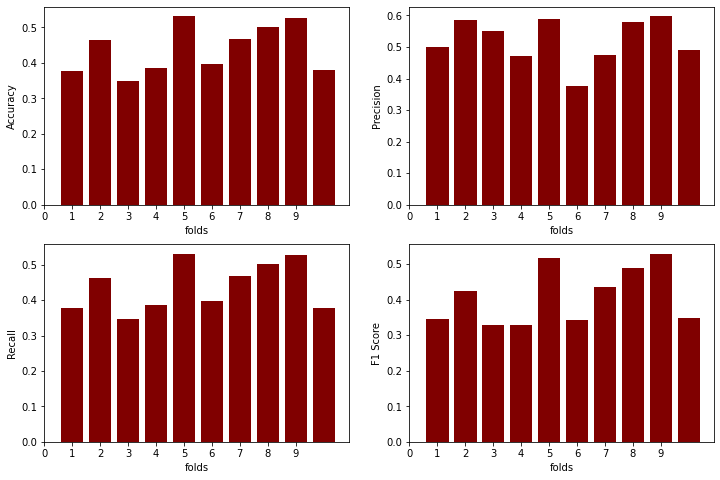

In [40]:
metrics = ['Accuracy','Precision','Recall','F1 Score']
fold_metrics = torch.tensor(fold_metrics)
plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.bar(range(1,folds+1),fold_metrics[:,i],color ='maroon')
    plt.xticks(range(folds))
    plt.ylabel(metrics[i])
    plt.xlabel('folds')